In [23]:
import pandas as pd
%config Completer.use_jedi = False
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, hinge_loss
from sklearn.model_selection import train_test_split, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC 


In [24]:
# Read in the data stored in the file 'survey lung cancer.csv'
df = pd.read_csv('survey lung cancer.csv')
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [25]:
# replace all M/F with 1/0
df.GENDER.replace(['M', 'F'], [1, 0], inplace=True)

# replace all YES/NO with 1/0
df.LUNG_CANCER.replace(['YES', 'NO'], [1, 0], inplace=True)

# Data analysis

In [26]:
print("Number of duplicates: ", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplcates after drop ", df.duplicated().sum())

Number of duplicates:  33
Number of duplcates after drop  0


## Histrogram

array([[<AxesSubplot:title={'center':'GENDER'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SMOKING'}>,
        <AxesSubplot:title={'center':'YELLOW_FINGERS'}>],
       [<AxesSubplot:title={'center':'ANXIETY'}>,
        <AxesSubplot:title={'center':'PEER_PRESSURE'}>,
        <AxesSubplot:title={'center':'CHRONIC DISEASE'}>,
        <AxesSubplot:title={'center':'FATIGUE '}>],
       [<AxesSubplot:title={'center':'ALLERGY '}>,
        <AxesSubplot:title={'center':'WHEEZING'}>,
        <AxesSubplot:title={'center':'ALCOHOL CONSUMING'}>,
        <AxesSubplot:title={'center':'COUGHING'}>],
       [<AxesSubplot:title={'center':'SHORTNESS OF BREATH'}>,
        <AxesSubplot:title={'center':'SWALLOWING DIFFICULTY'}>,
        <AxesSubplot:title={'center':'CHEST PAIN'}>,
        <AxesSubplot:title={'center':'LUNG_CANCER'}>]], dtype=object)

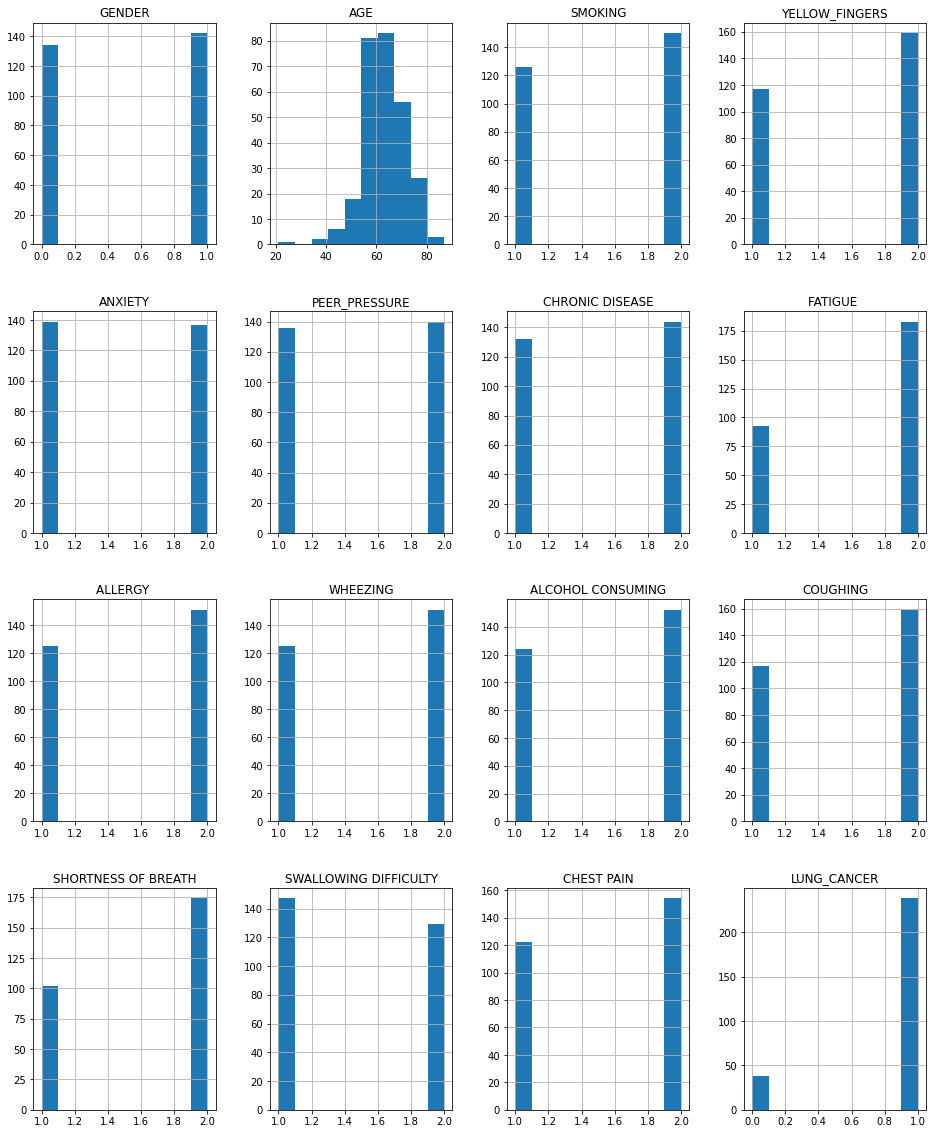

In [27]:
# Data histogram 
df.hist(figsize=(16,20))

## Heatmap

In [28]:
# create X and y sets
X = df.drop(columns="LUNG_CANCER").to_numpy()
X_ht = df.drop(columns="LUNG_CANCER", axis= 1)
y = df['LUNG_CANCER'].to_numpy().reshape(-1,)

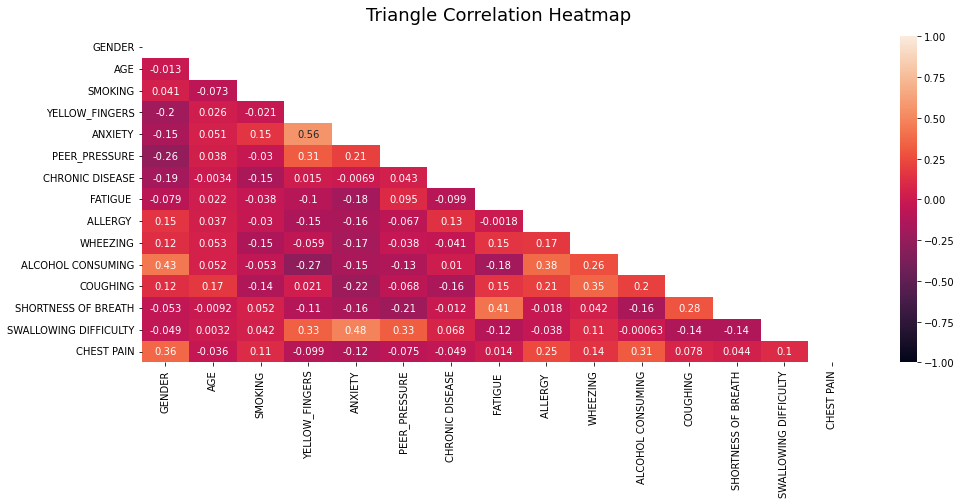

In [29]:
# Heatmap of dataframe
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(X_ht.corr()))
htmap = sns.heatmap(X_ht.corr(),vmin= -1, vmax= 1,  annot= True , mask = mask)
htmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e


## Virtual Inflation Factor VIF
Was just used for some manual testing

In [30]:
X_t = df.drop(columns="LUNG_CANCER", axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X_t.columns
vif_data["VIF"] = [variance_inflation_factor(X_t.values, i) for i in range(len(X_t.columns))]
print(vif_data.sort_values(by = ["VIF"]))

#https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

                  feature        VIF
0                  GENDER   3.012213
2                 SMOKING  10.738372
6         CHRONIC DISEASE  10.896006
8                ALLERGY   13.490502
5           PEER_PRESSURE  13.564503
9                WHEEZING  13.986291
14             CHEST PAIN  14.003207
13  SWALLOWING DIFFICULTY  15.218347
11               COUGHING  17.344194
10      ALCOHOL CONSUMING  17.545363
12    SHORTNESS OF BREATH  17.666498
7                FATIGUE   17.770848
3          YELLOW_FINGERS  19.138132
4                 ANXIETY  19.508213
1                     AGE  41.961929


# Machine Learning part


## Data splitting

In [31]:
# splitting out the test set, to be used later in comparing models 
X_reduced, X_test, y_reduced, y_test = train_test_split(X, y, test_size=0.2, shuffle=True) 
 

## Logistic Regression


In [32]:


# Spitting the data in 5 sets
kf = KFold(n_splits=5, shuffle=True, random_state=69)

#results for train error 
train_res_acc = []
train_res_err = []

# results for validation set
val_res_acc = []
val_res_err = []

# results for test set
test_res_acc = []
test_res_err = []

# iteration for k-fold
for train_index, val_index in kf.split(X_reduced):
    X_train, X_val= X_reduced[train_index], X_reduced[val_index]
    y_train, y_val= y_reduced[train_index], y_reduced[val_index]

    # make logistic regression model
    linreg = LogisticRegression(max_iter=100000)
    linreg.fit(X_train, y_train)


    # predict training set
    # calculate accuracy and logistic loss
    y_pred_train = linreg.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_err = log_loss(y_train, y_pred_train)

    # predict validation set
    # calculate accuracy and logistic loss
    y_pred_val = linreg.predict(X_val)
    val_acc = accuracy_score(y_val, y_pred_val)
    val_error = log_loss(y_val, y_pred_val)
    
    # predict test set
    # calculate accuracy and logistic loss
    y_pred_test = linreg.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_error = log_loss(y_test, y_pred_test)


    # append train results for later
    train_res_acc.append(train_acc)
    train_res_err.append(train_err)

    # append validation results for later
    val_res_acc.append(val_acc)
    val_res_err.append(val_error)
    
    # append test results for later
    test_res_acc.append(test_acc)
    test_res_err.append(test_error)




# print results
print("Logistic Regression")
print("Training accuracy: ", np.mean(train_res_acc))
print("Training error: ", np.mean(train_res_err))
print("Validation accuracy: ", np.mean(val_res_acc))
print("Validation error: ", np.mean(val_res_err))
print("Test accuracy: ", np.mean(test_res_acc))
print("Test error: ", np.mean(test_res_err))


Logistic Regression
Training accuracy:  0.9318181818181819
Training error:  2.354952917718011
Validation accuracy:  0.9090909090909092
Validation error:  3.1399396466465297
Test accuracy:  0.8892857142857142
Test error:  3.8240102063407724


## SVC

In [33]:
# Spitting the data in 5 sets
kf = KFold(n_splits=5, shuffle=True, random_state=69)

#results for train error 
train_res_acc2 = []
train_res_err2 = []

# results for validation set
val_res_acc2 = []
val_res_err2 = []

# results for test set
test_res_acc2 = []
test_res_err2 = []
 
# iteration for k-fold
for train_index, val_index in kf.split(X_reduced):
    X_train, X_val= X_reduced[train_index], X_reduced[val_index]
    y_train, y_val= y_reduced[train_index], y_reduced[val_index]


    #make SVC model
    svc = SVC(gamma='auto',kernel='linear')
    svc.fit(X_train,y_train)
    
    # predict training set
    # calculate accuracy and logistic loss
    y_pred_train2 = svc.predict(X_train)
    train_acc2 = accuracy_score(y_train, y_pred_train2)
    train_err2 = hinge_loss(y_train, y_pred_train2)

    # predict validation set
    # calculate accuracy and logistic loss
    y_pred_val2 = svc.predict(X_val)
    val_acc2 = accuracy_score(y_val, y_pred_val2)
    val_error2 = hinge_loss(y_val, y_pred_val2)
    
    # predict test set
    # calculate accuracy and logistic loss
    y_pred_test2 = svc.predict(X_test)
    test_acc2 = accuracy_score(y_test, y_pred_test2)
    test_error2 = hinge_loss(y_test, y_pred_test2)



    # append train results for later
    train_res_acc2.append(train_acc2)
    train_res_err2.append(train_err2)

    # append validation results for later
    val_res_acc2.append(val_acc2)
    val_res_err2.append(val_error2)

    # append test results for later
    test_res_acc2.append(test_acc2)
    test_res_err2.append(test_error2)

# print results
print("SVC")
print("Training accuracy: ", np.mean(train_res_acc2))
print("Training error: ", np.mean(train_res_err2))
print("Validation accuracy: ", np.mean(val_res_acc2))
print("Validation error: ", np.mean(val_res_err2))
print("Test accuracy: ", np.mean(test_res_acc2))
print("Test error: ", np.mean(test_res_err2))

    

SVC
Training accuracy:  0.9431818181818181
Training error:  0.19772727272727275
Validation accuracy:  0.9181818181818182
Validation error:  0.22272727272727272
Test accuracy:  0.8821428571428571
Test error:  0.24285714285714283
